# Endocrine Chemicals Dataset 


In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
from rdkit import Chem
from rdkit.Chem import MACCSkeys
from rdkit.Chem import PandasTools
from rdkit import DataStructs
from rdkit import RDConfig
from sklearn.cluster import DBSCAN
from sklearn import decomposition
from sklearn import datasets 

#Support_Vector_Machine 
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier 
import numpy as np
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier


import shap



In [53]:
chemicals = pd.read_csv("endocrine_dataset_with_names.csv")
chemicals.head()

,dtxsid,casrn,preferredName,inchi,maccs,y
0,DTXSID2020054,6109-97-3,3-Amino-9-ethylcarbazole hydrochloride,InChI=1S/C14H14N2.ClH/c1-2-16-13-6-4-3-5-11(13...,0000000000000000000000000000000000000000000000...,1
1,DTXSID7020057,82-28-0,1-Amino-2-methylanthraquinone,InChI=1S/C15H11NO2/c1-8-6-7-11-12(13(8)16)15(1...,0000000000000000000000000000000000000000000000...,1
2,DTXSID7020182,80-05-7,Bisphenol A,"InChI=1S/C15H16O2/c1-15(2,11-3-7-13(16)8-4-11)...",0000000000000000000000000000000000000000000000...,1
3,DTXSID2020139,50-32-8,Benzo(a)pyrene,InChI=1S/C20H12/c1-2-7-17-15(4-1)12-16-9-8-13-...,0000000000000000000000000000000000000000000000...,1
4,DTXSID3020209,94-26-8,4-Hydroxybenzoic acid butyl ester,InChI=1S/C11H14O3/c1-2-3-8-14-11(13)9-4-6-10(1...,0000000000000000000000000000000000000000000000...,1


In [54]:
smiles_map

,commonName,sMILES
0,4-Morpholinecarboxaldehyde,O=CN1CCOCC1
1,"Phosphorodithioic acid, O,O-bis(2-ethylhexyl) ...",CCCCC(CC)COP(S)(=S)OCC(CC)CCCC
2,Methfuroxam,CC1=C(C)C(C(=O)NC2=CC=CC=C2)=C(C)O1
3,"4-Methoxy-N-methyl-1,8-naphthalimide",COC1=C2C=CC=C3C(=O)N(C)C(=O)C(C=C1)=C23
4,Thiophanate-methyl,COC(=O)NC(=S)NC1=C(NC(=S)NC(=O)OC)C=CC=C1
...,...,...
7346,Valeronitrile,CCCCC#N
7347,Sodium bicarbonate,[Na+].OC([O-])=O
7348,"5,6-Benzoflavone",O=C1C=C(OC2=C1C1=C(C=CC=C1)C=C2)C1=CC=CC=C1
7349,Ximelagatran,CCOC(=O)CN[C@H](C1CCCCC1)C(=O)N1CC[C@H]1C(=O)N...


In [58]:
smiles_map = pd.read_csv("endocrine_chemicals (2).csv")
chemicals_with_smiles = chemicals.merge(right=smiles_map, how='left', left_on='preferredName', right_on='commonName')
chemicals_with_smiles

,dtxsid,casrn,preferredName,inchi,maccs,y,commonName,sMILES
0,DTXSID2020054,6109-97-3,3-Amino-9-ethylcarbazole hydrochloride,InChI=1S/C14H14N2.ClH/c1-2-16-13-6-4-3-5-11(13...,0000000000000000000000000000000000000000000000...,1,3-Amino-9-ethylcarbazole hydrochloride,Cl.CCN1C2=CC=CC=C2C2=C1C=CC(N)=C2
1,DTXSID7020057,82-28-0,1-Amino-2-methylanthraquinone,InChI=1S/C15H11NO2/c1-8-6-7-11-12(13(8)16)15(1...,0000000000000000000000000000000000000000000000...,1,1-Amino-2-methylanthraquinone,CC1=CC=C2C(=O)C3=C(C=CC=C3)C(=O)C2=C1N
2,DTXSID7020182,80-05-7,Bisphenol A,"InChI=1S/C15H16O2/c1-15(2,11-3-7-13(16)8-4-11)...",0000000000000000000000000000000000000000000000...,1,Bisphenol A,CC(C)(C1=CC=C(O)C=C1)C1=CC=C(O)C=C1
3,DTXSID2020139,50-32-8,Benzo(a)pyrene,InChI=1S/C20H12/c1-2-7-17-15(4-1)12-16-9-8-13-...,0000000000000000000000000000000000000000000000...,1,Benzo(a)pyrene,C1=CC2=CC3=CC=C4C=CC=C5C=CC(=C2C=C1)C3=C45
4,DTXSID3020209,94-26-8,4-Hydroxybenzoic acid butyl ester,InChI=1S/C11H14O3/c1-2-3-8-14-11(13)9-4-6-10(1...,0000000000000000000000000000000000000000000000...,1,NaN,NaN
...,...,...,...,...,...,...,...,...
3897,DTXSID0046513,111-01-3,Squalane,InChI=1S/C30H62/c1-25(2)15-11-19-29(7)23-13-21...,0000000000000000000000000000000000000000000000...,0,Squalane,CC(C)CCCC(C)CCCC(C)CCCCC(C)CCCC(C)CCCC(C)C
3898,DTXSID3026275,110-59-8,Valeronitrile,"InChI=1S/C5H9N/c1-2-3-4-5-6/h2-4H2,1H3",0000000000000000000000000000000000000000100000...,0,Valeronitrile,CCCCC#N
3899,DTXSID8030423,6051-87-2,"5,6-Benzoflavone",InChI=1S/C19H12O2/c20-16-12-18(14-7-2-1-3-8-14...,0000000000000000000000000000000000000000000000...,0,"5,6-Benzoflavone",O=C1C=C(OC2=C1C1=C(C=CC=C1)C=C2)C1=CC=CC=C1
3900,DTXSID5049075,192939-46-1,Ximelagatran,InChI=1S/C24H35N5O5/c1-2-34-20(30)15-26-21(17-...,0000000100100000000000010000000000000100000000...,0,Ximelagatran,CCOC(=O)CN[C@H](C1CCCCC1)C(=O)N1CC[C@H]1C(=O)N...


In [55]:
??pd.DataFrame.merge

# Column Add Ons

In [3]:
PandasTools.AddMoleculeColumnToFrame(chemicals, 'inchi', 'Molecule', includeFingerprints=True)

for index, row in chemicals.iterrows():
    mol = row.Molecule
    try:
        numatoms = mol.GetNumAtoms()
        chemicals.at[index, 'numatoms'] = numatoms
    except:
        print("error")
        
for index, row in chemicals.iterrows():
    mol = row.Molecule
    try:
        numbonds = mol.GetNumBonds()
        chemicals.at[index, 'numbonds'] = numbonds
    except:
        print("error")
        
for index, row in chemicals.iterrows():
    mol = row.Molecule 
    try:
        aromatic_atoms = mol.GetAromaticAtoms()
        chemicals.at[index, 'aromatic_atoms'] = aromatic_atoms
    except:
        print("error")
        
chemicals



[11:46:11] SMILES Parse Error: syntax error while parsing: InChI=1S/C14H14N2.ClH/c1-2-16-13-6-4-3-5-11(13)12-9-10(15)7-8-14(12)16;/h3-9H,2,15H2,1H3;1H
[11:46:11] SMILES Parse Error: Failed parsing SMILES 'InChI=1S/C14H14N2.ClH/c1-2-16-13-6-4-3-5-11(13)12-9-10(15)7-8-14(12)16;/h3-9H,2,15H2,1H3;1H' for input: 'InChI=1S/C14H14N2.ClH/c1-2-16-13-6-4-3-5-11(13)12-9-10(15)7-8-14(12)16;/h3-9H,2,15H2,1H3;1H'
[11:46:11] SMILES Parse Error: syntax error while parsing: InChI=1S/C15H11NO2/c1-8-6-7-11-12(13(8)16)15(18)10-5-3-2-4-9(10)14(11)17/h2-7H,16H2,1H3
[11:46:11] SMILES Parse Error: Failed parsing SMILES 'InChI=1S/C15H11NO2/c1-8-6-7-11-12(13(8)16)15(18)10-5-3-2-4-9(10)14(11)17/h2-7H,16H2,1H3' for input: 'InChI=1S/C15H11NO2/c1-8-6-7-11-12(13(8)16)15(18)10-5-3-2-4-9(10)14(11)17/h2-7H,16H2,1H3'
[11:46:11] SMILES Parse Error: syntax error while parsing: InChI=1S/C15H16O2/c1-15(2,11-3-7-13(16)8-4-11)12-5-9-14(17)10-6-12/h3-10,16-17H,1-2H3
[11:46:11] SMILES Parse Error: Failed parsing SMILES 'InChI=1

TypeError: No registered converter was able to produce a C++ rvalue of type std::__1::basic_string<wchar_t, std::__1::char_traits<wchar_t>, std::__1::allocator<wchar_t>> from this Python object of type float

# Converting MACCS Keys into X

In [17]:
col = chemicals['maccs']
col

0       0000000000000000000000000000000000000000000000...
1       0000000000000000000000000000000000000000000000...
2       0000000000000000000000000000000000000000000000...
3       0000000000000000000000000000000000000000000000...
4       0000000000000000000000000000000000000000000000...
                              ...                        
3897    0000000000000000000000000000000000000000000000...
3898    0000000000000000000000000000000000000000100000...
3899    0000000000000000000000000000000000000000000000...
3900    0000000100100000000000010000000000000100000000...
3901    0000000000000000000000000000000000000000000000...
Name: maccs, Length: 3902, dtype: object

In [18]:
chemicals_data_as_integers = []
for row in col:
    try:
        row_as_integers = [int(bit) for bit in str(row)]
        chemicals_data_as_integers.append(row_as_integers)
    except:
        pass
    
X =np.array(chemicals_data_as_integers, dtype=int)

X

array([[0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0],
       ...,
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0]])

In [19]:
X.shape

(3902, 166)

In [20]:
y = chemicals.y.to_numpy()

array([[0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0],
       ...,
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0]])

# Clustering 

In [ ]:
clustering = DBSCAN(eps=3, min_samples=2).fit(X)

clustering.labels_


In [ ]:
clustering

# 3D Plot 

In [ ]:
fig = plt.figure(1, figsize=(4, 3))
plt.clf()

ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X_transformed = pca.transform(X)

plt.scatter(X_transformed[:, 0], X_transformed[:, 1], X_transformed[:,2])

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

plt.show()

In [ ]:
X_transformed

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

#Validation
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.9)

print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

(3121, 166)
(781, 166)
(3121,)
(781,)
(2808, 166)
(781, 166)
(313, 166)


In [34]:
from tpot import TPOTClassifier

In [41]:
tpot_clf = TPOTClassifier(generations=75, population_size=50, scoring='balanced_accuracy', verbosity=2)

tpot_clf.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/3800 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7258001416727703

Generation 2 - Current best internal CV score: 0.7258001416727703

Generation 3 - Current best internal CV score: 0.7341952096894546

Generation 4 - Current best internal CV score: 0.7341952096894546

Generation 5 - Current best internal CV score: 0.7376819380399411

Generation 6 - Current best internal CV score: 0.7376819380399411

Generation 7 - Current best internal CV score: 0.7413312992229777

Generation 8 - Current best internal CV score: 0.7456390139701272

Generation 9 - Current best internal CV score: 0.7456390139701272

Generation 10 - Current best internal CV score: 0.7535517326258865

Generation 11 - Current best internal CV score: 0.7535517326258865

Generation 12 - Current best internal CV score: 0.7535517326258865

Generation 13 - Current best internal CV score: 0.7579758467125842

Generation 14 - Current best internal CV score: 0.7640928436624932

Generation 15 - Current best internal CV score: 0.769789

TPOTClassifier(generations=75, population_size=50, scoring='balanced_accuracy',
               verbosity=2)

In [48]:
print(tpot_clf.export())

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import StandardScaler
from tpot.builtins import StackingEstimator

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
features = tpot_data.drop('target', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'], random_state=None)

# Average CV score on the training set was: 0.7791997573166076
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=RandomForestClassifier(bootstrap=False, criterion="gini", max_features=0.25, min_samples_leaf=4, min_samples_split=17, n_

In [45]:
rf_clf = StandardScaler(RandomForestClassifier(bootstrap=False, criterion='gini', max_features=0.25, min_samples_leaf=4, min_samples_split=17, n_estimators=100))
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
balanced_accuracy_score(y_test, y_pred)


TypeError: StandardScaler.__init__() takes 1 positional argument but 2 were given

In [52]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import StandardScaler
from tpot.builtins import StackingEstimator

# Average CV score on the training set was: 0.7791997573166076
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=RandomForestClassifier(bootstrap=False, criterion="gini", max_features=0.25, min_samples_leaf=4, min_samples_split=17, n_estimators=100)),
    StandardScaler(),
    StackingEstimator(estimator=MLPClassifier(alpha=0.001, learning_rate_init=0.1)),
    BernoulliNB(alpha=1.0, fit_prior=False)
)

exported_pipeline.fit(X_train, y_train)
balanced_accuracy_score(exported_pipeline.predict(X_train), y_train)

0.64106033782215

# Algorithms

In [ ]:
clf = make_pipeline(StandardScaler(),LinearSVC())
clf.fit(X,y)
print(clf.named_steps['linearsvc'].coef_)
print(clf.named_steps['linearsvc'].intercept_)
print(clf.predict(X))
clf.score(X, y)

In [ ]:
clf = RandomForestClassifier(max_depth=3, random_state=0)
clf.fit(X,y)
clf.predict(X)
clf.score(X, y)

#from sklearn.metrics import balanced_accuracy_score

#clf = RandomForestClassifier(max_depth=5, class_weight='balanced')
#clf.fit(X,y)
#y_pred = clf.predict(X)
#clf.score(X, y)
#
#y_true = y

#balanced_accuracy_score(y_true, y_pred)

In [ ]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X, y)
print(clf.predict(X))
print(clf.score(X, y))

#clf = AdaBoostClassifier(n_estimators=100, random_state=0)
#clf.fit(X, y)
#print(clf.predict(X))
#y_pred = clf.predict(X)
#print(clf.score(X, y))

#y_true = y

#balanced_accuracy_score(y_true, y_pred)

In [ ]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X, y)
print(clf.predict(X))
y_pred = clf.predict(X)
print(clf.score(X, y))

y_true = y

balanced_accuracy_score(y_true, y_pred)

In [ ]:
clf = CategoricalNB()
clf.fit(X, y)
nb_y_pred = clf.predict(X)
clf.score(X, y)

In [ ]:
X.shape

# SVC 

In [5]:
#Accuracy 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score

clf = SVC()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

balanced_accuracy_score(y_test, y_pred)



NameError: name 'X_train' is not defined

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy


# Random Forest 

In [ ]:
model = RandomForestClassifier(n_estimators=150,max_depth=20,criterion="entropy")

model.fit(X_train, y_train)

RFC_y_pred = model.predict(X_test)

balanced_accuracy = balanced_accuracy_score(y_test, RFC_y_pred)

balanced_accuracy


In [ ]:
accuracy_RandomForest = accuracy_score(y_test, RFC_y_pred)
accuracy_RandomForest

# CategoricalNB

In [25]:
model_CNB = CategoricalNB() #none of the parameters give a betetr accuracy than 72

model_CNB.fit(X_train, y_train)

CNB_y_pred = model_CNB.predict(X_test)

balanced_accuracy_CNB = balanced_accuracy_score(y_test, CNB_y_pred)

balanced_accuracy_CNB

0.7368280078149618

In [ ]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)


In [ ]:
accuracy_CNB = accuracy_score(y_test, CNB_y_pred)
accuracy_CNB

#  AdaBoost 

In [ ]:
model_AdaBoost = AdaBoostClassifier(n_estimators=50) 

model_AdaBoost.fit(X_train, y_train)

AdaBoost_y_pred = model_AdaBoost.predict(X_test)

balanced_accuracy_AdaBoost = balanced_accuracy_score(y_test, AdaBoost_y_pred)

balanced_accuracy_AdaBoost

In [ ]:
accuracy_AdaBoost = accuracy_score(y_test, AdaBoost_y_pred)
accuracy_AdaBoost

# XGBoost

In [ ]:
model = XGBClassifier(n_estimators=150,max_depth=20)
model.fit(X_train, y_train)

XGB_y_pred = model.predict(X_test)

balanced_accuracy = balanced_accuracy_score(y_test, XGB_y_pred)

balanced_accuracy

In [ ]:
model = XGBClassifier(max_bin=256)
model.fit(X_train, y_train)

XGB_y_pred = model.predict(X_test)

balanced_accuracy = balanced_accuracy_score(y_test, XGB_y_pred)

balanced_accuracy

In [ ]:

feature_names = [
    'ISOTOPE',
    'limit the above def n since the RDKit only accepts up to #104',
    'Group IVa,Va,VIa Rows 4-6',
    'actinide',
    'Group IIIB,IVB (Sc...)',
    'Lanthanide',
    'Group VB,VIB,VIIB''QAAA@1',
    'Group VIII (Fe...)',
    'Group IIa (Alkaline earth)',
    '4M Ring',
    'Group IB,IIB (Cu..)',
    'ON(C)C',
    'S-S',
    'OC(O)O',
    'QAA@1',
    'CTC',
    'Group IIIA (B...)',
    '7M Ring',
    'Si',
    'C=C(Q)Q',
    '3M Ring',
    'NC(O)O',
    'N-O',
    'NC(N)N',
    'C$=C($A)$A',
    'I',
    'QCH2Q',
    'P',
    'CQ(C)(C)A',
    'QX',
    'CSN',
    'NS',
    'CH2=A',
    'Group IA (Alkali Metal)',
    'S Heterocycle',
    'NC(O)N',
    'NC(C)N',
    'OS(O)O',
    'S-O',
    'CTN',
    'F',
    'QHAQH',
    'OTHER',
    'C=CN',
    'BR',
    'SAN',
    'OQ(O)O',
    'CHARGE',
    'C=C(C)C',
    'CSO',
    'NN',
    'QHAAAQH',
    'QHAAQH',
    'OSO',
    'ON(O)C',
    'O Heterocycle',
    'QSQ','Snot%A%A',
    'S=O',
    'AS(A)A',
    'A$!A$A',
    'N=O',
    'A$A!S',
    'C%N',
    'CC(C)(C)A',
    'QS',
    'QHQH (&...) SPEC Incomplete',
    'QQH',
    'QNQ',
    'NO',
    'OAAO',
    'S=A',
    'CH3ACH3',
    'A!N$A',
    'C=C(A)A',
    'NAN',
    'C=N',
    'NAAN',
    'NAAAN',
    'SA(A)A',
    'ACH2QH',
    'QAAAA@1',
    'NH2',
    'CN(C)C',
    'CH2QCH2',
    'X!A$A',
    'S',
    'OAAAO',
    'QHAACH2A',
    'QHAAACH2A',
    'OC(N)C',
    'QCH3',
    'QN',
    'NAAO',
    '5 M ring',
    'NAAAO',
    'QAAAAA@1',
    'C=C','ACH2N',
    '8M Ring or larger. This only handles up to ring sizes of 14',
    'QO',
    'CL',
    'QHACH2A',
    'A$A($A)$A',
    'QA(Q)Q',
    'XA(A)A',
    'CH3AAACH2A',
    'ACH2O',
    'NCO',
    'NACH2A',
    'AA(A)(A)A',
    'Onot%A%A',
    'CH3CH2A',
    'CH3ACH2A',
    'CH3AACH2A',
    'NAO',
    'ACH2CH2A > 1',
    'N=A',
    'Heterocyclic atom > 1 (&...) Spec Incomplete',
    'N Heterocycle',
    'AN(A)A',
    'OCO',
    'QQ',
    'Aromatic Ring > 1',
    'A!O!A','A$A!O > 1 (&...) Spec Incomplete',
    'ACH2AAACH2A',
    'ACH2AACH2A',
    'QQ > 1 (&...)  Spec Incomplete',
    'QH > 1',
    'OACH2A', 
    'A$A!N',
    'X (HALOGEN)',
    'Nnot%A%A',
    'O=A>1', 
    'Heterocycle',
    'QCH2A>1 (&...) Spec Incomplete',
    'OH',
    'O > 3 (&...) Spec Incomplete',
    'CH3 > 2  (&...) Spec Incomplete',
    'N > 1','A$A!O',
    'Anot%A%Anot%A',
    '6M ring > 1',
    'O > 2',
    'ACH2CH2A',
    'AQ(A)A',
    'CH3 > 1',
    'A!A$A!A',
    'NH',
    'OC(C)C',
    'QCH2A',
    'C=O',
    'A!CH2!A',
    'NA(A)A',
    'C-O',
    'C-N',
    'O>1',
    'CH3',
    'N',
    'Aromatic',
    '6M Ring',
    'O',
    'Ring',
    'Fragments  FIX: this can''t be done in SMARTS',
]

In [ ]:
len(feature_names)

In [23]:
X.shape

(3902, 166)

In [27]:
model_CNB

CategoricalNB()

In [32]:
X_train

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 1, 1, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [31]:
explainer = shap.KernelExplainer(model_CNB.predict, X_train)
shap_values = explainer.shap_values(X_train[:100,:])

Using 2808 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/100 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [14]:
X_train

array([[1],
       [2],
       [3]])

In [22]:
X_train

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 1, 1, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

- - -

# ROC Curves

In [95]:
from sklearn.metrics import roc_curve, roc_auc_score

In [84]:
# Example 1: Categorical Naive Bayes

cnb = CategoricalNB()
cnb.fit(X_train, y_train)
cnb_y_pred = cnb.predict(X_test)
cnb_y_proba = cnb.predict_proba(X_test)[:,1]

print(balanced_accuracy_score(y_test, cnb_y_pred))

0.7368280078149618


In [85]:
# Example 2: Random Forest Classifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)
rf_y_proba = rf.predict_proba(X_test)[:,1]

print(balanced_accuracy_score(y_test, rf_y_pred))

0.671031070775824


In [97]:
# Create ROC values

roc_list = []

cnb_roc_fpr, cnb_roc_tpr, _ = roc_curve(y_test, cnb_y_proba)
cnb_roc_auc = roc_auc_score(y_test, cnb_y_proba)
cnb_label = 'Categorical NB\n(AUC=' + str(round(cnb_roc_auc, 2)) + ')'

rf_roc_fpr, rf_roc_tpr, _ = roc_curve(y_test, rf_y_proba)
rf_roc_auc = roc_auc_score(y_test, rf_y_proba)
rf_label = 'Random Forest\n(AUC=' + str(round(rf_roc_auc, 2)) + ')'

roc_list.append((cnb_roc_fpr, cnb_roc_tpr, cnb_label))
roc_list.append((rf_roc_fpr, rf_roc_tpr, rf_label))

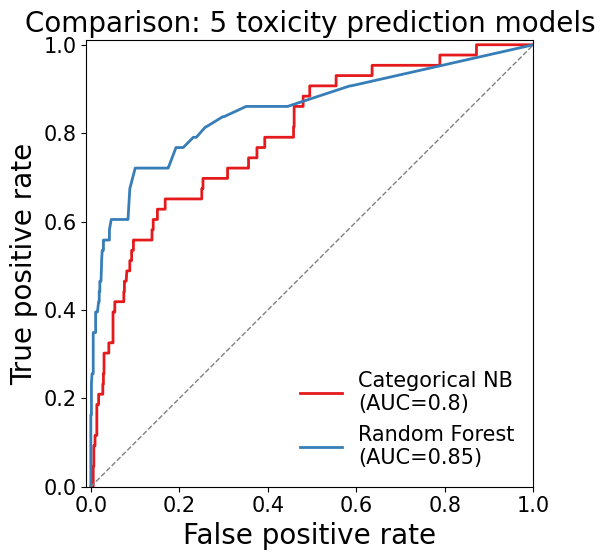

In [99]:
# Make plot

plot_color = [plt.cm.Set1(0), plt.cm.Set1(1), plt.cm.Set1(2)]

plt.figure(figsize=(6,6))

plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rc('legend', fontsize=15)

# Here's where we plot the actual curves
for nrl in range(0, len(roc_list)):
    rl = roc_list[nrl]
    rl_fpr, rl_tpr, rl_label = rl
    plt.plot(rl_fpr, rl_tpr, lw=2, label=rl_label, color=plot_color[nrl])

# Plot the dashed line
plt.plot([0,1], [0,1], color='grey', lw=1, linestyle='--')

# Add other graphical elements
plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Comparison: 5 toxicity prediction models')
plt.legend(loc='lower right', frameon = False)
plt.tight_layout()
plt.savefig('./roc_plot.pdf')